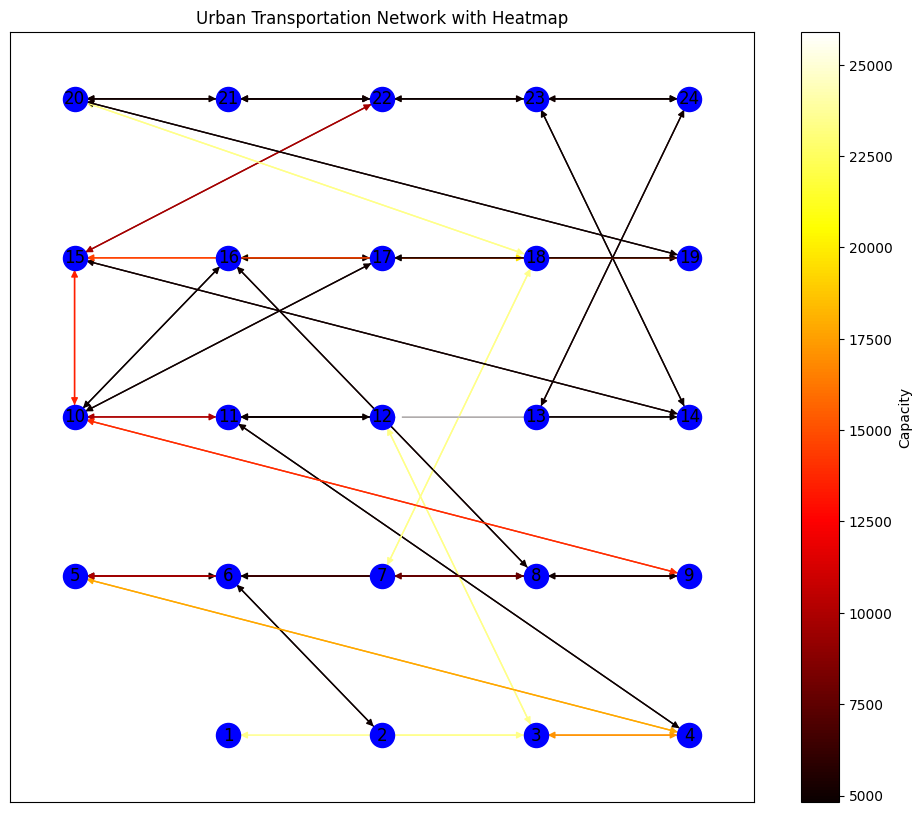

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Read the TNTP file and extract the relevant columns
def read_tntp_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    data_lines = False
    edges = []

    for line in lines:
        if '<END OF METADATA>' in line:
            data_lines = True
            continue
        if data_lines:
            if line.strip() and not line.startswith('~'):
                parts = line.strip().split()
                link_id = int(parts[0])
                init_node = int(parts[1])
                term_node = int(parts[2])
                capacity = float(parts[3])
                edges.append((init_node, term_node, capacity))
    
    return edges

# Create a graph from the extracted data
def create_graph(edges):
    G = nx.DiGraph()
    for edge in edges:
        G.add_edge(edge[0], edge[1], capacity=edge[2])
    return G

# Plot the graph with a heatmap based on edge capacities
def plot_graph_with_heatmap(G):
    pos = {i: (i % 5, i // 5) for i in G.nodes()}  # Generate positions for nodes
    edge_capacities = [G[u][v]['capacity'] for u, v in G.edges]
    norm = plt.Normalize(vmin=min(edge_capacities), vmax=max(edge_capacities))

    plt.figure(figsize=(12, 10))
    edges = nx.draw_networkx_edges(G, pos, edge_color=edge_capacities, edge_cmap=plt.cm.hot, edge_vmin=min(edge_capacities), edge_vmax=max(edge_capacities))
    nodes = nx.draw_networkx_nodes(G, pos, node_size=300, node_color='blue')
    labels = nx.draw_networkx_labels(G, pos)

    sm = plt.cm.ScalarMappable(cmap=plt.cm.hot, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, label='Capacity')

    plt.title('Urban Transportation Network with Heatmap')
    plt.show()

# Path to the TNTP file
file_path = 'SiouxFalls_net.tntp'

# Read the file, create the graph, and plot it
edges = read_tntp_file(file_path)
G = create_graph(edges)
plot_graph_with_heatmap(G)


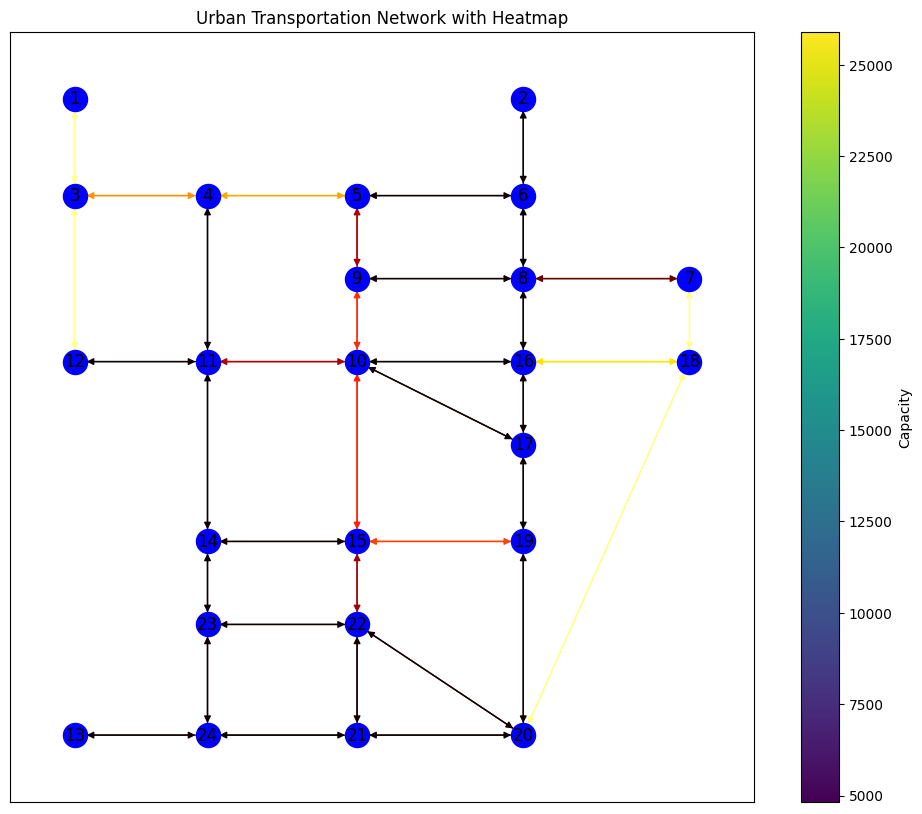

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read the TNTP file and extract the relevant columns
def read_tntp_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    data_lines = False
    edges = []

    for line in lines:
        if '<END OF METADATA>' in line:
            data_lines = True
            continue
        if data_lines:
            if line.strip() and not line.startswith('~'):
                parts = line.strip().split()
                link_id = int(parts[0])
                init_node = int(parts[1])
                term_node = int(parts[2])
                capacity = float(parts[3])
                edges.append((init_node, term_node, capacity))
    
    return edges

# Create a graph from the extracted data
def create_graph(edges):
    G = nx.DiGraph()
    for edge in edges:
        G.add_edge(edge[0], edge[1], capacity=edge[2])
    return G

# Plot the graph with a heatmap based on edge capacities and exact node coordinates
def plot_graph_with_heatmap(G, pos):
    edge_capacities = [G[u][v]['capacity'] for u, v in G.edges]
    norm = plt.Normalize(vmin=min(edge_capacities), vmax=max(edge_capacities))

    plt.figure(figsize=(12, 10))
    edges = nx.draw_networkx_edges(G, pos, edge_color=edge_capacities, edge_cmap=plt.cm.hot, edge_vmin=min(edge_capacities), edge_vmax=max(edge_capacities))
    nodes = nx.draw_networkx_nodes(G, pos, node_size=300, node_color='blue')
    labels = nx.draw_networkx_labels(G, pos)

    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, label='Capacity')

    plt.title('Urban Transportation Network with Heatmap')
    plt.show()

# Path to the TNTP file
tntp_file_path = 'SiouxFalls_net.tntp'

# Load the node coordinates from the CSV file
nodes_df = pd.read_csv('SiouxFalls_node.csv')
pos = {row['Node']: (row['X'], row['Y']) for _, row in nodes_df.iterrows()}

# Read the file, create the graph, and plot it
edges = read_tntp_file(tntp_file_path)
G = create_graph(edges)
plot_graph_with_heatmap(G, pos)
